<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/EA3_US_Health_Insurance_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción de la evidencia de aprendizaje

Caracterización de datos en el contexto organizacional, tomando como base una empresa en la que trabaje alguno de los miembros del equipo, la industria o, en su defecto, seleccionando alguna del portal de Datos Abiertos del Gobierno Nacional o escogiendo un ente territorial de interés del grupo.

# Instrucciones

* Cada grupo de trabajo debe entregar la evidencia de la actividad usando el enlace de una copia de este notebook por medio de la plataforma y con la siguiente estructura:

* Identificación del contexto en el que se ejecuta el proyecto (empresa, sector de la industria, datos abiertos del Estado).

* Explicación del desarrollo del proyecto.

* Descripción del conjunto de datos que será abordado.

* Identificación de los métodos o técnicas utilizadas.

* Análisis, representación y visualización de los resultados.

* Conclusiones de la caracterización estadística de los datos.



---
Para generar el enlace para compartir, dan clic en el botón "Share" o "Compartir" en la parte superior derecha. Este enlace es el que subirán a la plataforma. Suban un enlace por grupo.





1.   Juan Felipe Cardona Arango
2.   Alejandra Restrepo López
1.   Natalia María Gutiérrez Pérez
2.   Lincon Javier Gómez Gil
1.   Adrián Camilo Peña Cerón








# **Desarrollo EA3**

# Contexto

En este proyecto, se llevó a cabo un análisis y exploración de un conjunto de datos de costos médicos en los seguros de salud de EE. UU. con el objetivo de obtener información valiosa y encontrar respuestas mediante pruebas estadísticas de hipótesis.

La capacidad de aprovechar la información de los clientes es fundamental para la mayoría de las empresas. En el caso de una compañía de seguros, ciertos atributos de los clientes, como edad, numero de hijos , sexo , tendencias a fumar etc pueden resultar cruciales para la toma de decisiones empresariales en el ambito de seguros medicos. Por tanto, saber explorar y generar valor a partir de estos datos puede ser una habilidad inestimable





# Información de los atributos:
* Edad(AGE): Edad del beneficiario principal
* Sexo(SEX): Género del contratante del seguro, mujer / hombre
* bmi(IMC): Índice de masa corporal, que proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg / 𝑚2
 ) utilizando la relación entre la altura y el peso, idealmente de 18,5 a 24,9
* Niños(Children): Número de hijos cubiertos por el seguro de enfermedad / Número de personas a cargo
* Fumador(Smoke): Fumador / No fumador
* Región: Zona de residencia del beneficiario en EE.UU., noreste, sureste, suroeste, noroeste.
*Gastos(Charges) Gastos médicos individuales facturados por el seguro de enfermedad

Disponible en 
[US Health Insurance Dataset](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset)



## Objetivos


*   Realizar una analisis univariado y multivariados de los datos
*   Realizar un cojunto de exploraciones mendiente visualizacion 



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Lectura y Carga de Datos

In [2]:
data=pd.read_csv("/content/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Observacion**

Se verifica el tipo de objeto de cada columna , esto comprende un paso crucial para el posterior procesamiento de datos y generacion de graficas y establecimiento de relaciones( analisis multivariado)

In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Limpieza de datos

In [7]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

**Observacion**

No se encontraton datos faltantes o nulos

# Resumen y medidas de tendencia de atributos

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Analisis Univariado

Se define una funcion para generar varios tipos de graficos  que sea reutilizable para hacer en analisis de cata atributo del data set en esta funcion de define (boxplot; violinplot; displot y kdeplot) con el ds de visualizar la distribucion de los datos y algunas de las medidas de tendencia central


In [9]:
def sumario(x):
    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')

  
    plt.show()


## Edad

<ipython-input-9-a33595db82d9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data[x], color = 'r')


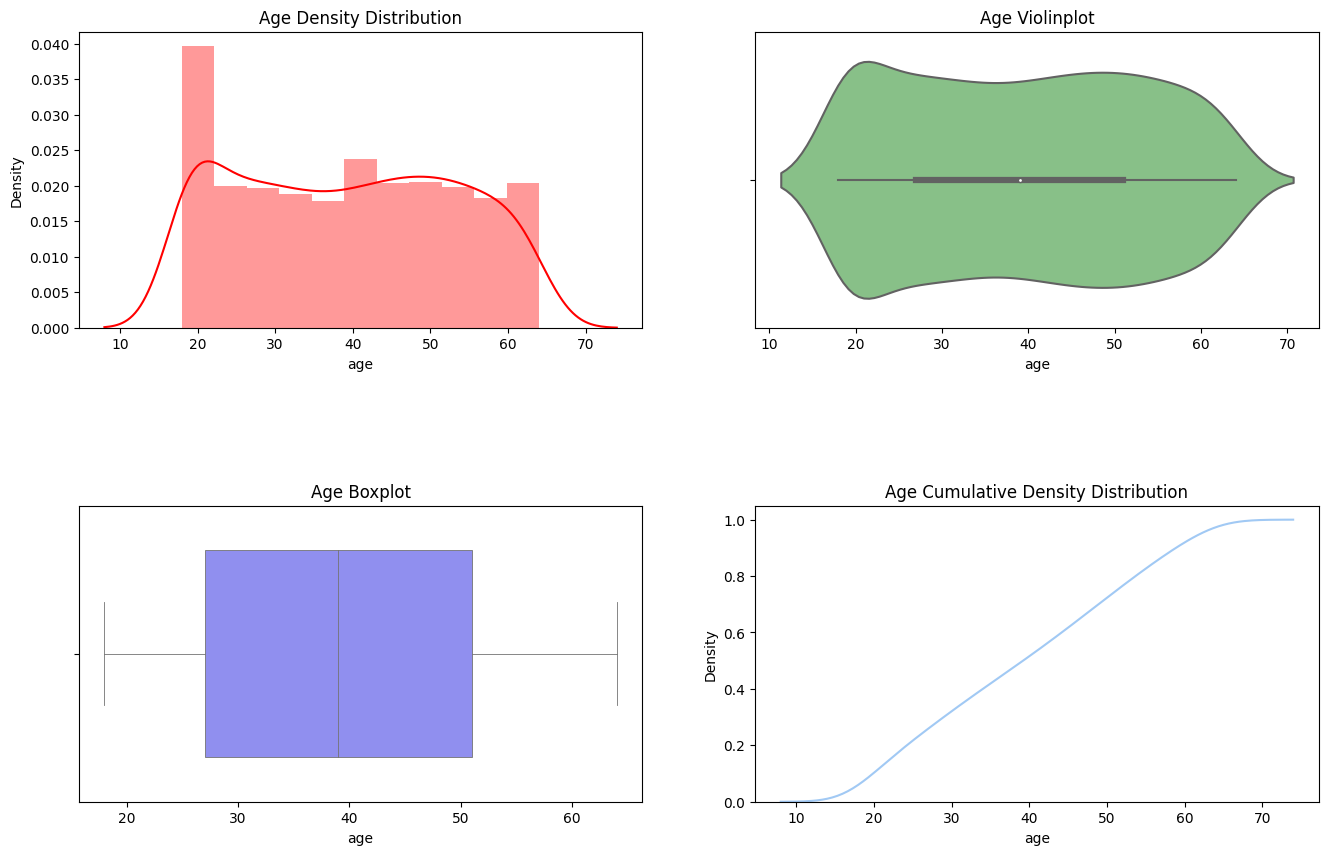

In [10]:
sumario("age")

## Cargos

<ipython-input-9-a33595db82d9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data[x], color = 'r')


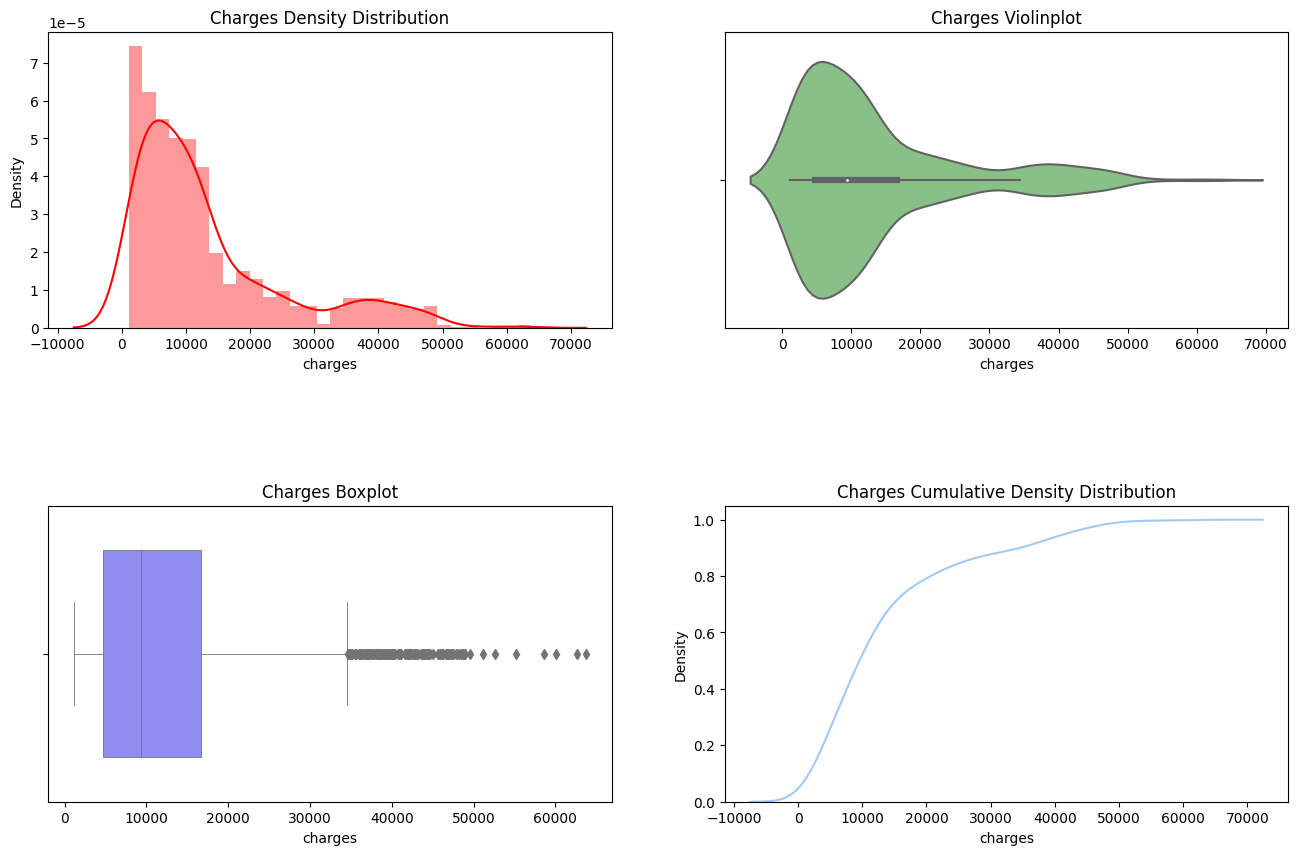

In [11]:
sumario("charges")

## IMC


<ipython-input-9-a33595db82d9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data[x], color = 'r')


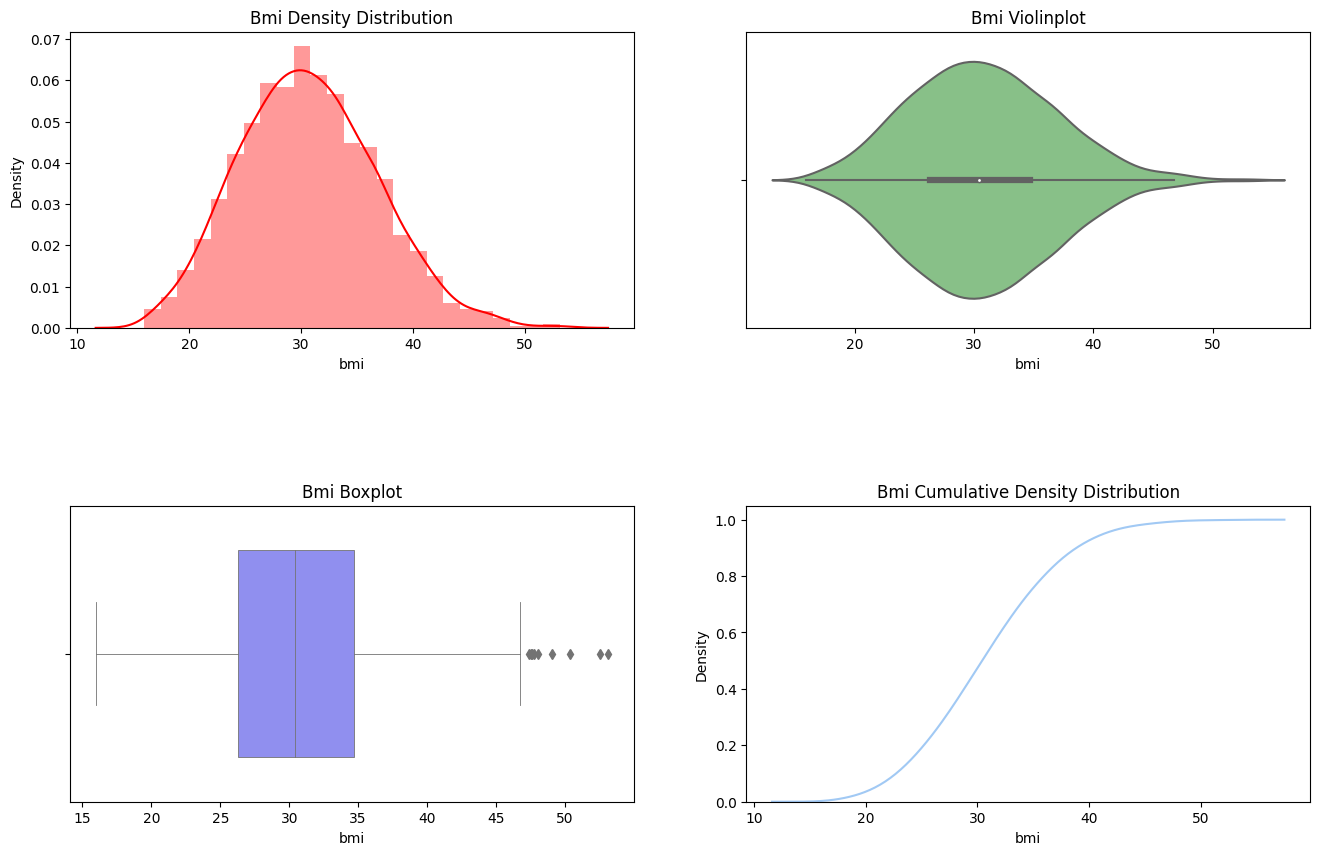

In [12]:
sumario("bmi")

## Hijos

<ipython-input-9-a33595db82d9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data[x], color = 'r')


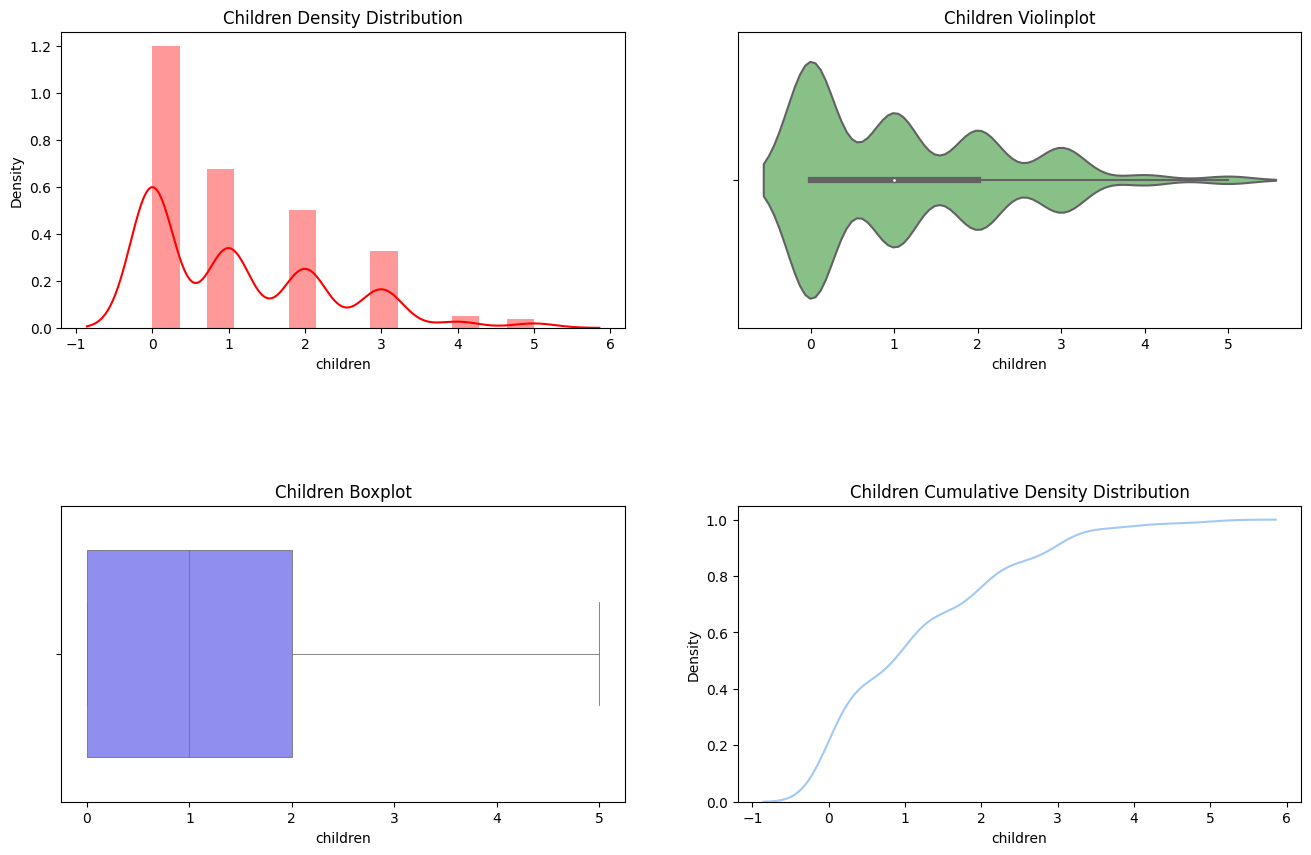

In [13]:
sumario("children")

S

<Axes: xlabel='sex', ylabel='count'>

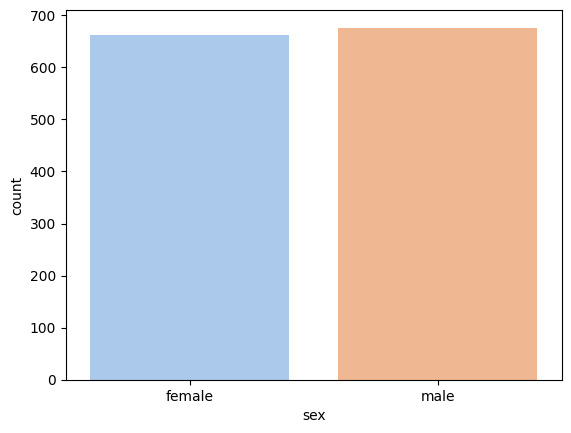

In [14]:
sns.countplot(x = 'sex', data = data)

# Analisis Multivariado

## Tratamiento de datos categoricos

Se procede a hacer una transformacion de tipo de los objetos, inicialmente como se expreso en la parte de descripcion de datos  solo habian dos tipos int64 y object , con el fin de hacer el analisis multivariado se procede a cambiiar los datos tipo objeto a categorico


In [15]:
for x in [ 'sex', 'children', 'smoker', 'region']:
  data[x]= data[x].astype("category")
data.dtypes


age            int64
sex         category
bmi          float64
children    category
smoker      category
region      category
charges      float64
dtype: object

In [16]:
type(data.dtypes)

pandas.core.series.Series

In [17]:
cat_columnas= data.select_dtypes(["category"]).columns
cat_columnas

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [18]:
data[cat_columnas] = data[cat_columnas].apply(lambda x: x.cat.codes)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Pairplot

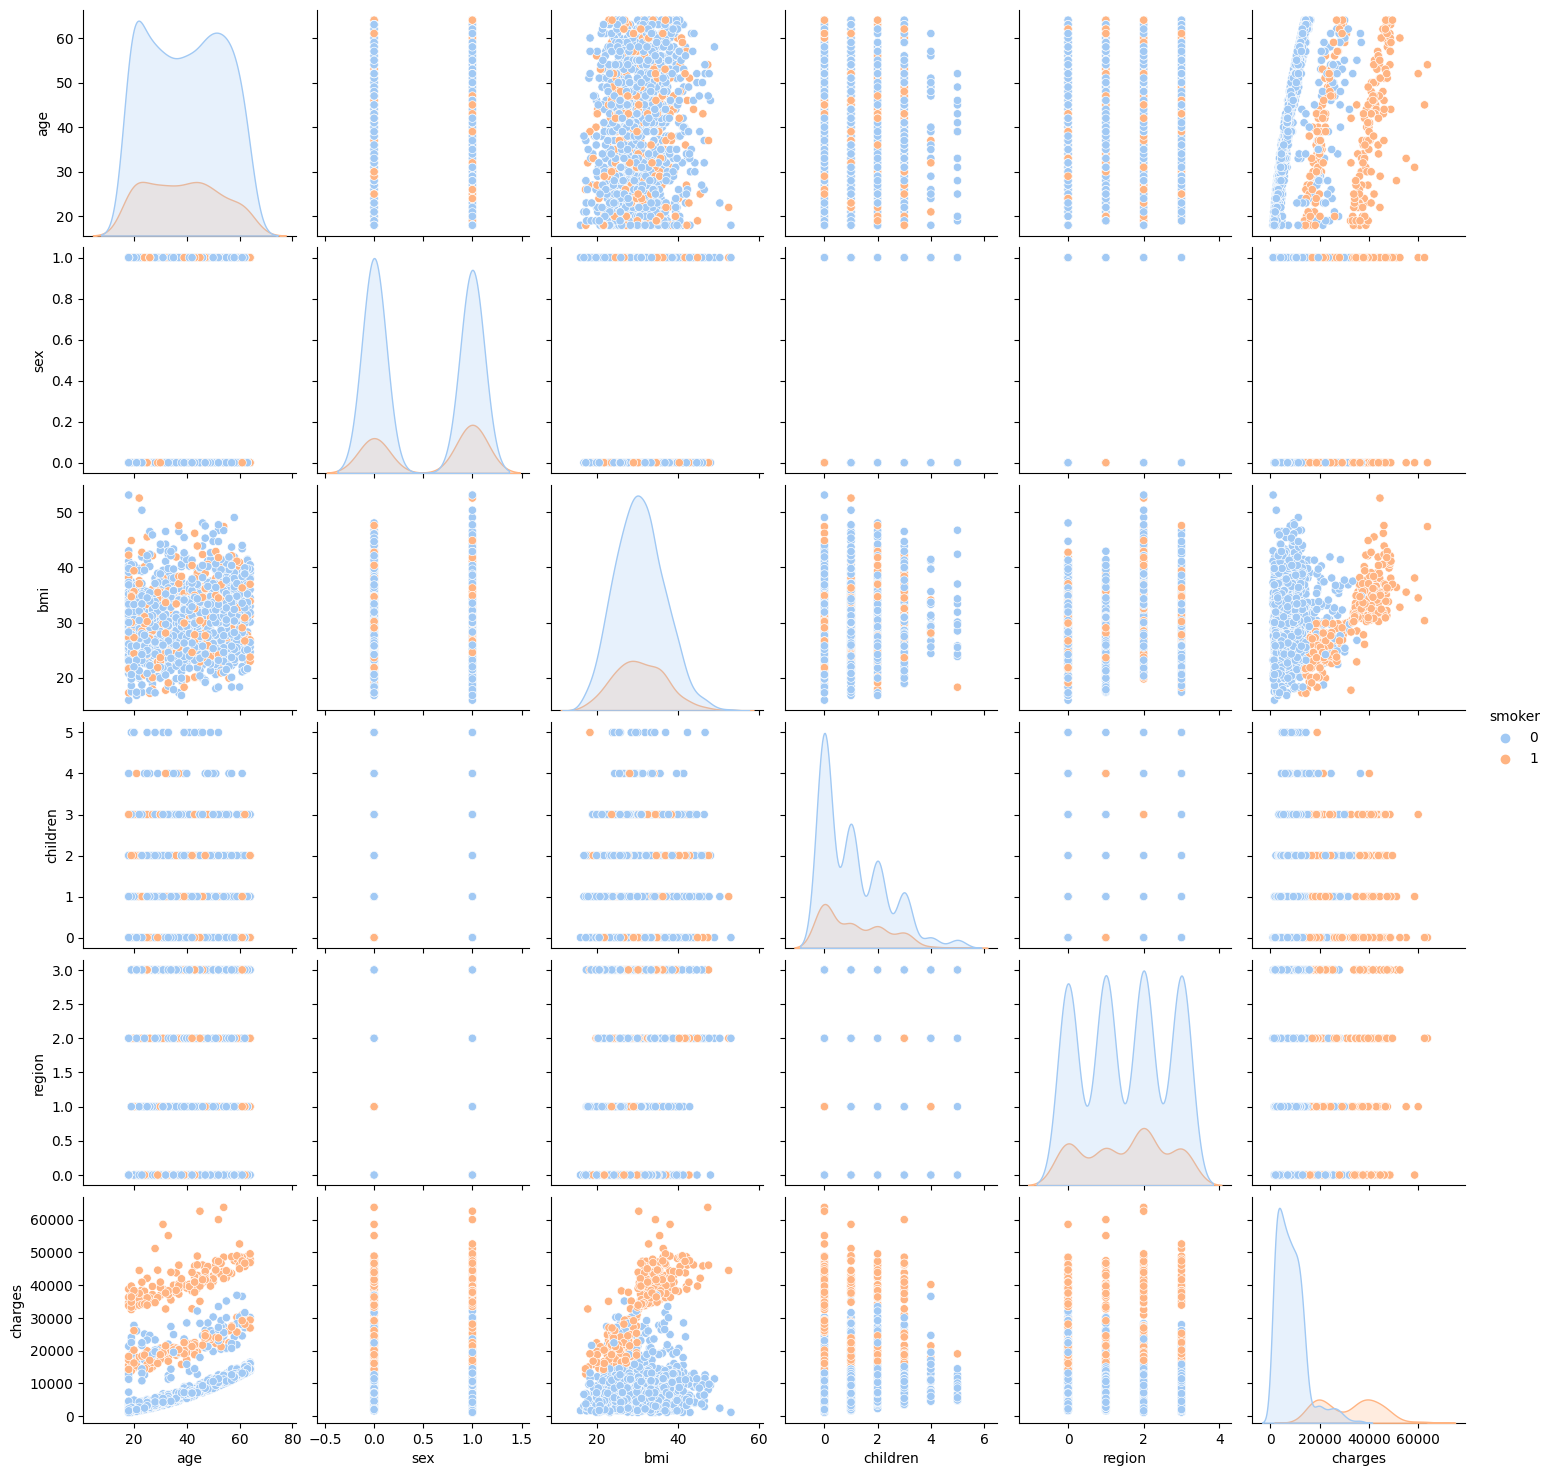

In [19]:
sns.pairplot(data, hue = "smoker")

Observacion


*   Se observa que a mayor BMI(IMC) mayor gastos por persona, lo cual el consistente , a mayor IMC mayor prevalencia de enfemdades asociadas al exceso de peso.



# Analisis de Correlacion

Se realiza el estudio de correlacion entre diferentes atibutos en el data set con el fin de observar el grado de fuerza entre las mismas.

<Axes: >

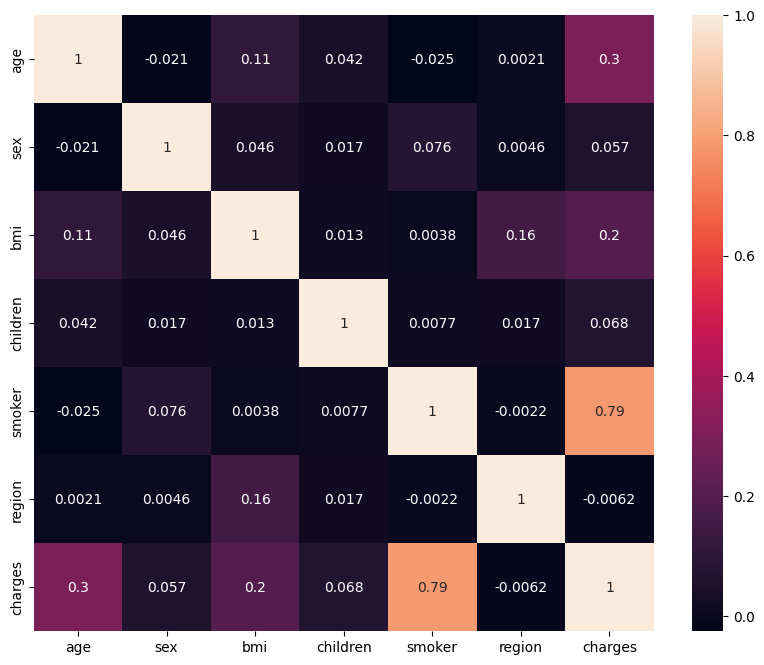

In [20]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)

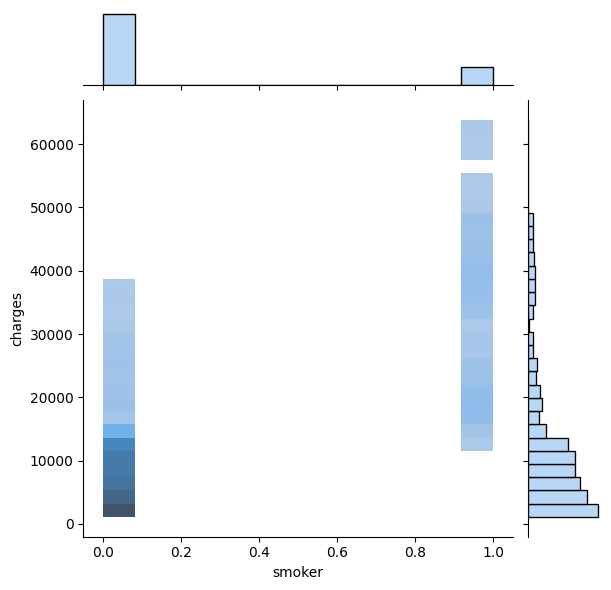

In [21]:
sns.jointplot(data , x="smoker", y="charges",kind="hist")

Observacion 


*   A partir del mapa de calor , se puede concluir un fuerte relacion positiva entre la Edad y el IMC(BMI) , del mismo modo entre la tendencia de fumar y el BMI lo cual se relaciona con un mayor costo de cargos


